# A* Motion Planning

In [19]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from P1_astar import DetOccupancyGrid2D, AStar
from utils import generate_planning_problem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Run A* planning

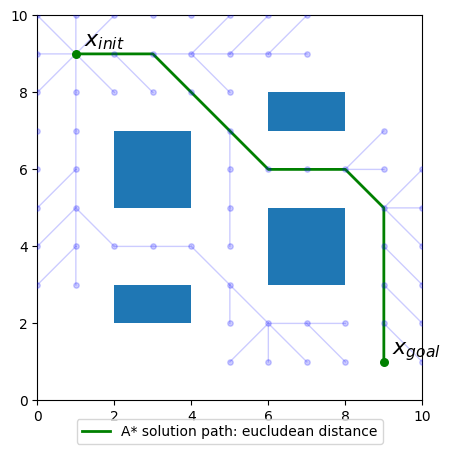

In [21]:
width = 10
height = 10
obstacles = [((6,7),(8,8)),((2,2),(4,3)),((2,5),(4,7)),((6,3),(8,5))]
occupancy = DetOccupancyGrid2D(width, height, obstacles)

x_init = (1, 9)
x_goal = (9, 1)

astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, AStar.eucludean_distance)
if not astar.solve():
    print("No path found")
else:
    plt.rcParams['figure.figsize'] = [5, 5]
    astar.plot_path()
    astar.plot_tree()

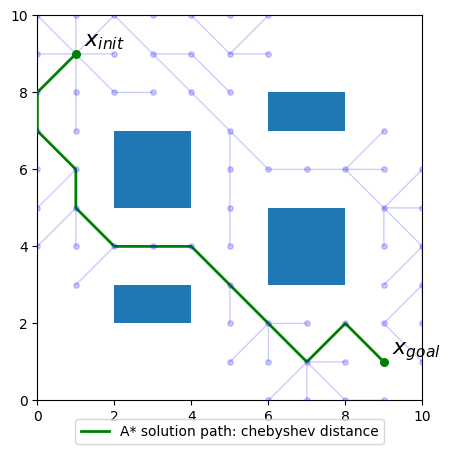

In [22]:
## Using L-inf norm distance function 
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, AStar.chebyshev_distance)
if not astar.solve():
    print("No path found")
else:
    plt.rcParams['figure.figsize'] = [5, 5]
    astar.plot_path(fig_num=1)
    astar.plot_tree()

## Random Cluttered Environment
### Generate workspace, start and goal positions
(Try changing these and see what happens)

In [11]:
width = 10
height = 10
num_obs = 25
min_size = .5
max_size = 3
mySeed = 79
print(mySeed)

79


### Run A* planning

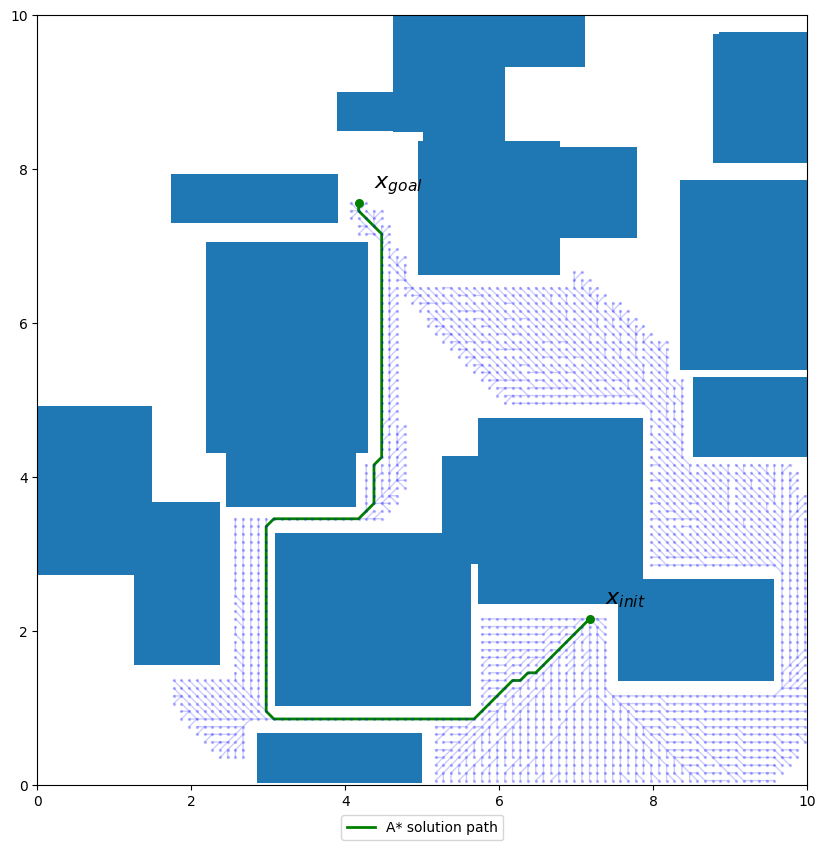

In [12]:
np.random.seed(mySeed)
occupancy, x_init, x_goal = generate_planning_problem(width, height, num_obs, min_size, max_size)

# seed = 79, h(x, y) uses L2-norm distance
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, AStar.eucludean_distance, resolution=0.1)

if not astar.solve():
    print("No path found! (This is normal, try re-running the block above)")
else:
    plt.rcParams['figure.figsize'] = [10, 10]
    astar.plot_path()
    astar.plot_tree(point_size=2)

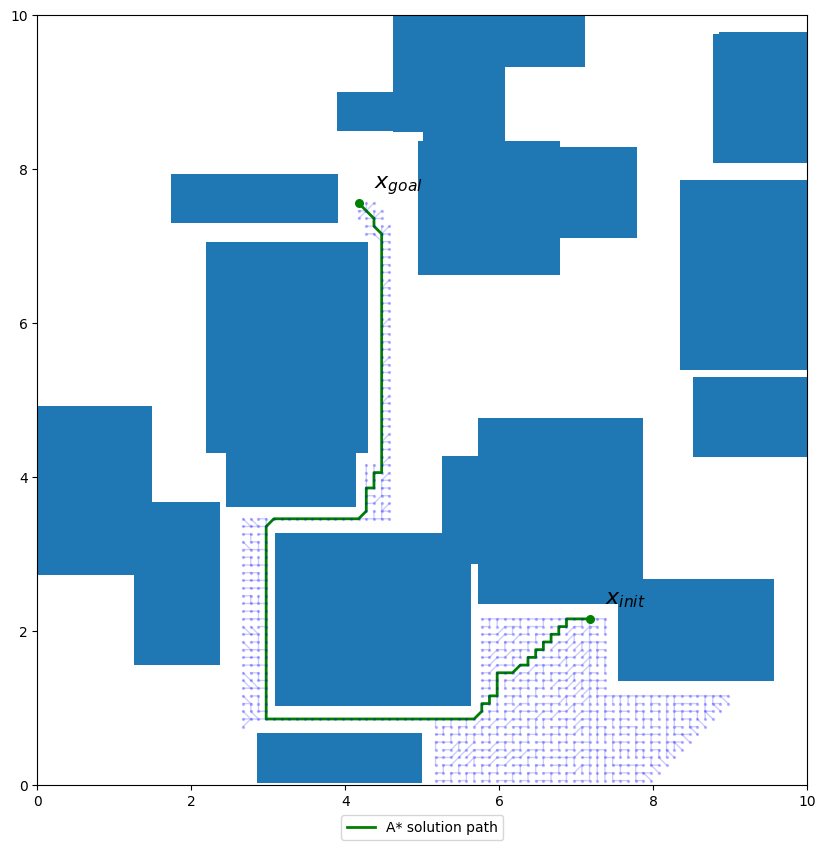

In [13]:
# seed = 79, h(x, y) uses L1-norm distance
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, AStar.manhattan_distance, resolution=0.1)

if not astar.solve():
    print("No path found! (This is normal, try re-running the block above)")
else:
    plt.rcParams['figure.figsize'] = [10, 10]
    astar.plot_path()
    astar.plot_tree(point_size=2)

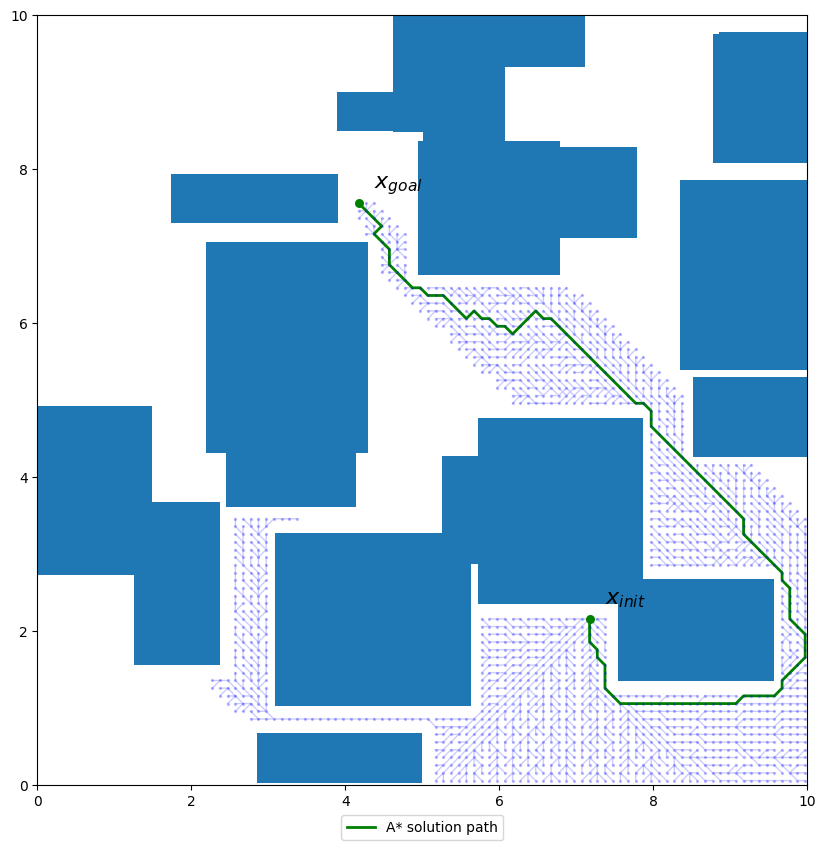

In [14]:
# seed = 79, h(x, y) uses L-inf norm distance
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, AStar.chebyshev_distance, resolution=0.1)

if not astar.solve():
    print("No path found! (This is normal, try re-running the block above)")
else:
    plt.rcParams['figure.figsize'] = [10, 10]
    astar.plot_path()
    astar.plot_tree(point_size=2)